<a href="https://www.kaggle.com/code/thirumani/shark-tank-brasil-data-analysis?scriptVersionId=270972580" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## <p style="background-color:lightblue;color:white;font-size:24px;text-align:center;border-radius:10px 10px;font-weight:bold;border:2px solid #800080;"> SharkTank Brazil Exploratory Data Analysis (EDA) 🦈</p>
## Dataset https://www.kaggle.com/datasets/thirumani/sharktank-brasil-dataset

In [1]:
from IPython.display import IFrame
import datetime
print("Notebook was last executed on:", datetime.date.today().strftime("%Y-%b-%d"), "with Python version")
!python --version

Notebook was last executed on: 2025-Oct-26 with Python version
Python 3.11.13


In [2]:
# Source: Wikipedia
IFrame('https://upload.wikimedia.org/wikipedia/pt/d/d8/Logotipo_Shark_Tank.jpg', width=390, height=275)

## ⚒️ Importing Required Python Libraries

In [3]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 50)

import matplotlib.pyplot as plt
import seaborn as sns
from babel.numbers import format_currency
from wordcloud import WordCloud, STOPWORDS
import geopandas as gpd
import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly_dark"
pio.renderers.default = 'notebook'

## ⏳ Check and import dataset

In [4]:
! ls -l /kaggle/input/sharktank-brasil-dataset/
shark_tank = pd.read_csv('/kaggle/input/sharktank-brasil-dataset/Shark Tank Brasil dataset.csv')

nRow, nCol = shark_tank.shape
print(f'\nThere are {nRow} rows and {nCol} columns in the dataset')

total 24
-rw-r--r-- 1 nobody nogroup 22302 Oct 26 09:47 'Shark Tank Brasil dataset.csv'

There are 272 rows and 19 columns in the dataset


## 💵 Exploratory Data Analysis (EDA)

In [5]:
shark_tank.head(5)

,Season Number,Startup Name,Episode Number,Pitch Number,Season Start,Season End,Original Air Date,Industry,Business Description,Original Ask Amount,Original Offered Equity,Valuation Requested,Got Deal,Total Deal Amount,Total Deal Equity,Deal Valuation,Deal Has Conditions,Number of Sharks in Deal,Invested Shark Names
0,1,Gourmetzinho,1.0,1,10-Oct-2016,26-Jan-2017,10-Oct-2016,Food and Beverage,Salty snacks,500000.0,20.0,2500000.0,1.0,600000.0,60.0,1000000.0,NaN,3.0,"João Appolinário, Robinson Shiba, Sorocaba"
1,1,Revo Foot,1.0,2,10-Oct-2016,26-Jan-2017,10-Oct-2016,NaN,NaN,400000.0,20.0,2000000.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,1,Velo,1.0,3,10-Oct-2016,26-Jan-2017,10-Oct-2016,Children/Education,Bicycle parts,400000.0,20.0,2000000.0,1.0,400000.0,50.0,800000.0,NaN,2.0,"Camila Farani, Cristiana Arcangeli"
3,1,Bosta em Lata,1.0,4,10-Oct-2016,26-Jan-2017,10-Oct-2016,NaN,NaN,150000.0,30.0,500000.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,1,Mana Manutenção,2.0,5,10-Oct-2016,26-Jan-2017,17-Oct-2016,NaN,NaN,100000.0,10.0,1000000.0,1.0,100000.0,50.0,200000.0,NaN,3.0,"Camila Farani, Cristiana Arcangeli, Robinson S..."


In [6]:
shark_tank.tail(10).T

,262,263,264,265,266,267,268,269,270,271
Season Number,9,9,9,9,9,9,9,9,9,9
Startup Name,Hackone,Instituto AB,Projeto Tatuísta,Roomys Sorvetes,Holy,Samba Fitness,iHUNGRY,Café Quilombo,Bartô,BioOnco
Episode Number,5.0,5.0,5.0,6.0,6.0,7.0,7.0,7.0,8.0,8.0
Pitch Number,263,264,265,266,267,268,269,270,271,272
Season Start,16-Sep-2024,16-Sep-2024,16-Sep-2024,16-Sep-2024,16-Sep-2024,16-Sep-2024,16-Sep-2024,16-Sep-2024,16-Sep-2024,16-Sep-2024
Season End,18-Nov-2024,18-Nov-2024,18-Nov-2024,18-Nov-2024,18-Nov-2024,18-Nov-2024,18-Nov-2024,18-Nov-2024,18-Nov-2024,18-Nov-2024
Original Air Date,30-Sep-2024,30-Sep-2024,30-Sep-2024,3-Oct-2024,3-Oct-2024,7-Oct-2024,7-Oct-2024,7-Oct-2024,10-Oct-2024,10-Oct-2024
Industry,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Business Description,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Original Ask Amount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
shark_tank['Season Number'] = shark_tank['Season Number'].astype(pd.Int32Dtype())
shark_tank['Episode Number'] = shark_tank['Episode Number'].astype(pd.Int32Dtype())

# shark_tank['Original Ask Amount'] = shark_tank['Original Ask Amount'].astype(pd.Int32Dtype())

shark_tank['Startup Name'] = shark_tank['Startup Name'].astype(str)

In [8]:
shark_tank.sample(10).style.set_properties(**{"background-color": "#2a9d8f","color":"white","border": "1px solid black", 'font-size': '10pt'})

,Season Number,Startup Name,Episode Number,Pitch Number,Season Start,Season End,Original Air Date,Industry,Business Description,Original Ask Amount,Original Offered Equity,Valuation Requested,Got Deal,Total Deal Amount,Total Deal Equity,Deal Valuation,Deal Has Conditions,Number of Sharks in Deal,Invested Shark Names
132,4,Trashin,2,133,28-Jun-2019,18-Oct-2019,5-Jul-2019,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
88,2,Insider,6,89,22-Jun-2017,14-Sep-2017,27-Jul-2017,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
131,4,Goodbiba,2,132,28-Jun-2019,18-Oct-2019,5-Jul-2019,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
79,2,Red Feather,4,80,22-Jun-2017,14-Sep-2017,13-Jul-2017,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
242,6,Ecomilhas,12,243,24-Sep-2021,17-Dec-2021,10-Dec-2021,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
4,1,Mana Manutenção,2,5,10-Oct-2016,26-Jan-2017,17-Oct-2016,nan,nan,100000.000000,10.000000,1000000.000000,1.000000,100000.000000,50.000000,200000.000000,nan,3.000000,"Camila Farani, Cristiana Arcangeli, Robinson Shiba"
244,6,E-Senses,12,245,24-Sep-2021,17-Dec-2021,10-Dec-2021,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
133,4,Oppa,3,134,28-Jun-2019,18-Oct-2019,12-Jul-2019,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
104,2,Canana,11,105,22-Jun-2017,14-Sep-2017,31-Aug-2017,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
31,1,Peau mature,8,32,10-Oct-2016,26-Jan-2017,28-Nov-2016,nan,nan,300000.000000,10.000000,3000000.000000,0.000000,nan,nan,nan,nan,nan,nan


In [9]:
shark_tank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272 entries, 0 to 271
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Season Number             272 non-null    Int32  
 1   Startup Name              272 non-null    object 
 2   Episode Number            263 non-null    Int32  
 3   Pitch Number              272 non-null    int64  
 4   Season Start              264 non-null    object 
 5   Season End                256 non-null    object 
 6   Original Air Date         258 non-null    object 
 7   Industry                  23 non-null     object 
 8   Business Description      26 non-null     object 
 9   Original Ask Amount       83 non-null     float64
 10  Original Offered Equity   83 non-null     float64
 11  Valuation Requested       83 non-null     float64
 12  Got Deal                  83 non-null     float64
 13  Total Deal Amount         33 non-null     float64
 14  Total Deal

In [10]:
shark_tank.describe().T.round(2).style.background_gradient(cmap = 'Oranges')

,count,mean,std,min,25%,50%,75%,max
Season Number,272.000000,3.672794,2.368208,1.000000,2.000000,4.000000,6.000000,9.000000
Episode Number,263.000000,7.338403,4.331177,1.000000,4.000000,7.000000,11.000000,16.000000
Pitch Number,272.000000,136.500000,78.663842,1.000000,68.750000,136.500000,204.250000,272.000000
Original Ask Amount,83.000000,799698.855422,2516755.701665,5.000000,200000.000000,300000.000000,500000.000000,20000000.000000
Original Offered Equity,83.000000,15.114458,8.643454,4.000000,10.000000,10.000000,20.000000,40.000000
Valuation Requested,83.000000,9838947.409639,44854501.921293,17.000000,1276666.500000,2000000.000000,5000000.000000,400000000.000000
Got Deal,83.000000,0.397590,0.492375,0.000000,0.000000,0.000000,1.000000,1.000000
Total Deal Amount,33.000000,325606.212121,221026.343364,5.000000,200000.000000,300000.000000,400000.000000,1000000.000000
Total Deal Equity,34.000000,35.882353,15.889323,0.000000,21.250000,35.000000,50.000000,60.000000
Deal Valuation,33.000000,1148384.393939,1306731.286511,0.000000,500000.000000,800000.000000,1000000.000000,6666667.000000


In [11]:
# Unique values in each column
for col in shark_tank.columns:
    print("Number of unique values in", col, "-", shark_tank[col].nunique())

Number of unique values in Season Number - 9
Number of unique values in Startup Name - 269
Number of unique values in Episode Number - 16
Number of unique values in Pitch Number - 272
Number of unique values in Season Start - 7
Number of unique values in Season End - 6
Number of unique values in Original Air Date - 68
Number of unique values in Industry - 8
Number of unique values in Business Description - 26
Number of unique values in Original Ask Amount - 30
Number of unique values in Original Offered Equity - 11
Number of unique values in Valuation Requested - 42
Number of unique values in Got Deal - 2
Number of unique values in Total Deal Amount - 16
Number of unique values in Total Deal Equity - 11
Number of unique values in Deal Valuation - 21
Number of unique values in Deal Has Conditions - 1
Number of unique values in Number of Sharks in Deal - 4
Number of unique values in Invested Shark Names - 22


In [12]:
# Latest/current season data
shark_tank_recent = shark_tank.loc[(shark_tank['Season Number']==9)]

In [13]:
# Data set information
print(shark_tank['Season Number'].max(), "total seasons in Brazilian SharkTank\n")

9 total seasons in Brazilian SharkTank



Season Number    1   2  3   4  5   6  9
Episode Number  16  13  2  16  5  13  8


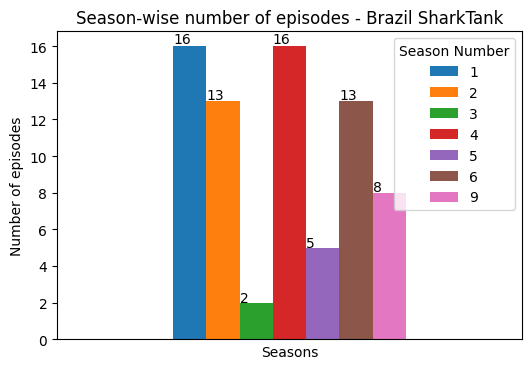

In [14]:
# Season-wise number of episodes
tmp = pd.pivot_table(shark_tank, values='Episode Number', columns='Season Number', aggfunc='max')
print(tmp)
ax = tmp.plot.bar(figsize=(6,4), title="Season-wise number of episodes - Brazil SharkTank")
plt.xlabel("Seasons")
plt.ylabel("Number of episodes")
plt.xticks([])
for t in ax.patches:
    if (np.isnan(float(t.get_height()))):
        ax.annotate(0, (t.get_x(), 0))
    else:
        ax.annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.01))

In [15]:
# Season-wise number of pitches
tmp = shark_tank['Season Number'].value_counts().sort_values()
fig = px.bar(tmp, x=tmp.values, title="<b> Shark Tank Brasil - Season-wise number of pitches</b>", template='plotly_white', text=tmp, width=560, height=400)
fig.update_yaxes(tickvals=list(range(10)))
fig.update_xaxes(visible=False)
fig.show(renderer="iframe")

In [16]:
# There were 3 to 5 pitches, in a each episode
print(shark_tank[['Season Number','Episode Number']].value_counts().sort_values(ascending=True).unique())

[1 2 3 4 5]


In [17]:
# Types of industries, came for investments, in all seasons
tmp = shark_tank['Industry'].value_counts().sort_values(ascending=True)
fig = px.bar(tmp, x=tmp.values, title="<b> Brazil Shark Tank - Industry wise startups (in all seasons)</b>", template='simple_white', text=tmp, width=850, height=700)
fig.update_yaxes(title_text="")
fig.update_xaxes(visible=False)
fig.show(renderer="iframe")

In [18]:
# All seasons averages
pivot = pd.pivot_table(shark_tank, values=['Original Ask Amount','Total Deal Amount','Valuation Requested','Deal Valuation','Original Offered Equity','Total Deal Equity'], columns='Season Number', aggfunc=np.mean, sort=False)
pivot.style.format('{:.0f}')

# Amount & Valuation is in BRL and equity in %

Season Number,1,2,3,4,5,6,7,8,9
Original Ask Amount,770379,228751,350000,750000,275000,300000,500000,500000,10000000
Total Deal Amount,303095,170001,350000,750000,275000,300000,500000,500000,nan
Valuation Requested,10065343,1290002,3500000,10000000,3250000,2000000,5000000,5000000,100000000
Deal Valuation,728413,604171,1750000,5416667,800000,1000000,2500000,2500000,nan
Original Offered Equity,15,21,10,8,12,15,10,10,10
Total Deal Equity,42,28,20,14,38,30,20,20,nan


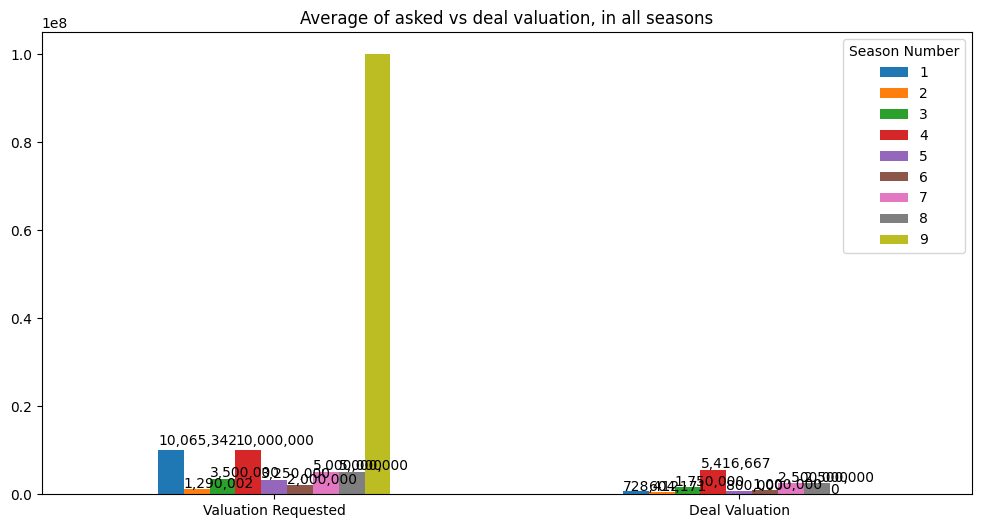

In [19]:
# All seasons average of offered/deal valuation
ax = pd.pivot_table(shark_tank, values=['Valuation Requested','Deal Valuation'], columns='Season Number', aggfunc=np.mean, sort=False).plot.bar(figsize=(12,6), title="Average of asked vs deal valuation, in all seasons")
plt.xticks(rotation='horizontal')
for t in ax.patches:
    if (np.isnan(float(t.get_height()))):
        ax.annotate(0, (t.get_x(), 0))
    else:
        ax.annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.12))

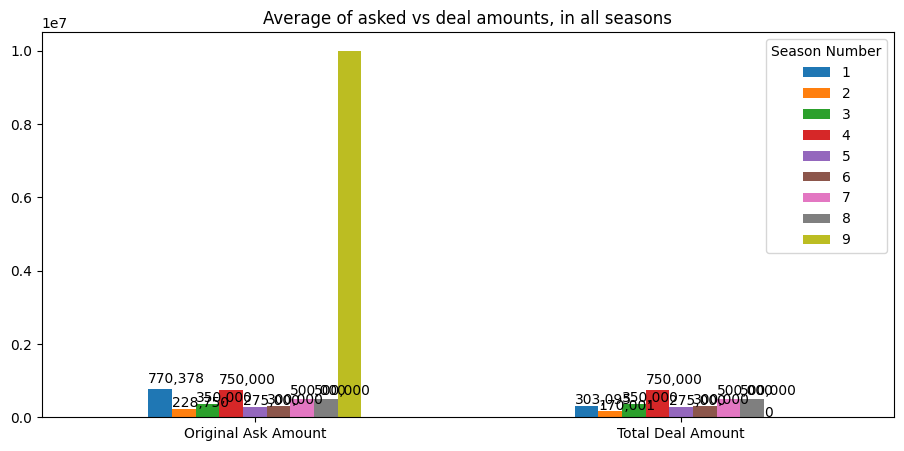

In [20]:
# All seasons average of offered/deal amounts
ax = pd.pivot_table(shark_tank, values=['Original Ask Amount','Total Deal Amount'], columns='Season Number', aggfunc=np.mean, sort=False).plot.bar(figsize=(11,5), title="Average of asked vs deal amounts, in all seasons")
plt.xticks(rotation='horizontal')
for t in ax.patches:
    if (np.isnan(float(t.get_height()))):
        ax.annotate(0, (t.get_x(), 0))
    else:
        ax.annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.2))

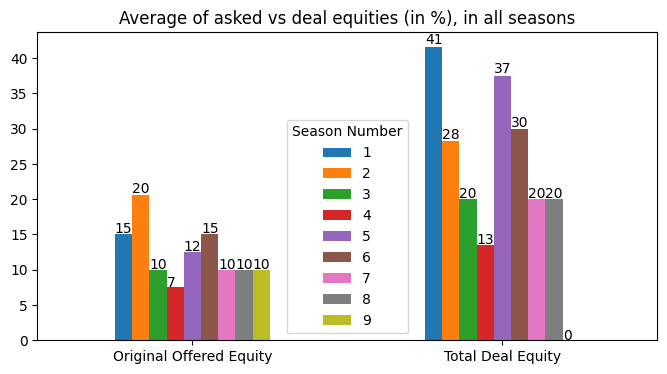

In [21]:
# All seasons average of offered/deal equities
ax = pd.pivot_table(shark_tank, values=['Original Offered Equity','Total Deal Equity'], columns='Season Number', aggfunc=np.mean, sort=False).plot.bar(figsize=(8,4), title="Average of asked vs deal equities (in %), in all seasons")
plt.xticks(rotation='horizontal')
for t in ax.patches:
    if (np.isnan(float(t.get_height()))):
        ax.annotate(0, (t.get_x(), 0))
    else:
        ax.annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.01))

### 💹 40% companies received offers and 60% startups could not convince Sharks to invest

Got Deal
0.0    50
1.0    33
Name: count, dtype: int64 

Got Deal
0.0    60%
1.0    40%
Name: proportion, dtype: object


Text(0, 0.5, '')

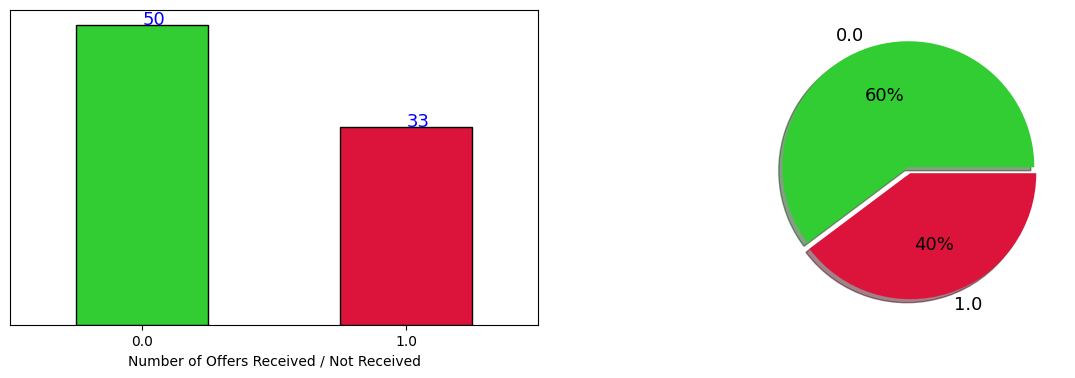

In [22]:
# Offers received
print(shark_tank['Got Deal'].value_counts(), "\n")
print(round(shark_tank['Got Deal'].value_counts(normalize=True)*100).astype(str).str.replace('.0', '%', regex=False))

plt.figure(figsize = (15,9))
ax1 = plt.subplot(221)
shark_tank["Got Deal"].value_counts().plot(kind='bar', color=["limegreen","crimson"], ec="k")
plt.xlabel("Number of Offers Received / Not Received")
plt.yticks([])
plt.xticks(rotation=0)
for x,y in enumerate(shark_tank["Got Deal"].value_counts()):
    plt.annotate(y, (x,y), fontsize=13, color="blue")
    
ax2 = plt.subplot(222)
shark_tank["Got Deal"].value_counts().plot(kind='pie', autopct='%.0f%%', explode = (0,0.05), colors=["limegreen","crimson"], shadow=True, fontsize=13)
plt.ylabel('')

# 33 companies Got Deals & 50 startups could not convince #Sharks to invest.

In [23]:
# Maximum amount requested
print("Maximum amount requested, by a pitcher -", format_currency(shark_tank['Original Ask Amount'].max(), 'BRL', locale='en_US').replace(".00", ""))

Maximum amount requested, by a pitcher - R$20,000,000


In [24]:
# Least amount requested
print("Least amount requested, by a pitcher -", format_currency(shark_tank['Original Ask Amount'].min(), 'BRL', locale='en_US').replace(".00", ""))

Least amount requested, by a pitcher - R$5


In [25]:
# Sum of investment amount asked, in Shark Tank Brasil
print("Sum of investment amount asked, by all startup companies, in Brazil Shark Tank -", format_currency(shark_tank['Original Ask Amount'].sum(), 'BRL', locale='en_US').replace(".00", ""))

Sum of investment amount asked, by all startup companies, in Brazil Shark Tank - R$66,375,005


In [26]:
# Amount invested by all sharks, in Brazil SharkTank
print("Amount invested by all sharks, in Shark Tank Brasil -", format_currency(shark_tank['Total Deal Amount'].sum(), 'BRL', locale='en_US').replace(".00", ""))

Amount invested by all sharks, in Shark Tank Brasil - R$10,745,005


In [27]:
# Top 15 investments, as per total investment/deal amount
print(shark_tank.groupby('Startup Name')['Total Deal Amount'].max().nlargest(15))

shark_tank['Total Deal Amount in Millions'] = shark_tank['Total Deal Amount']/1000000
tmpdf = shark_tank.sort_values('Total Deal Amount in Millions', ascending=False)[0:15]
fig = px.bar(tmpdf, x="Startup Name", y='Total Deal Amount in Millions', color="Startup Name", title="Highest investment as per deal amount (in millions)", text=tmpdf['Total Deal Amount in Millions'].map(float).map(str))
fig.show(renderer="iframe")

# TressCabelos has biggest deal in #SharkTankBrasil history

Startup Name
Deixa Que Eu Pago       1000000.0
Tress Cabelos           1000000.0
Gourmetzinho             600000.0
B. Craftsman             500000.0
Credere                  500000.0
Insider                  500000.0
Peter Paiva Saboaria     500000.0
Natural Science          400000.0
Velo                     400000.0
Mei Mei                  350000.0
Robotron                 330000.0
Borda e Lenha            300000.0
Cartooneria              300000.0
Egosss                   300000.0
Flow Games               300000.0
Name: Total Deal Amount, dtype: float64


In [28]:
# Top 20 investments, as per total equity/shares percentage diluted
print(shark_tank.groupby('Startup Name')['Total Deal Equity'].max().nlargest(20))

tmpdf = shark_tank.sort_values('Total Deal Equity', ascending=False)[0:20]
fig = px.bar(tmpdf, x="Startup Name", y='Total Deal Equity', color="Startup Name", title="Highest investment as per equity percentage", text=tmpdf['Total Deal Equity'].map(int).map(str) + "%")
fig.show(renderer="iframe")

Startup Name
Gourmetzinho            60.0
Tagine                  60.0
Banho Bungee            50.0
Bodout                  50.0
Borda e Lenha           50.0
Cadeirinha Smart        50.0
Cartooneria             50.0
Goleiro de Aluguel      50.0
Kuba                    50.0
Mana Manutenção         50.0
Natural Science         50.0
Peter Paiva Saboaria    50.0
Tress Cabelos           50.0
Velo                    50.0
Vent7                   50.0
QG Food Truck           40.0
Enlite                  35.0
Naked                   35.0
Robotron                33.0
Alfa Look's             30.0
Name: Total Deal Equity, dtype: float64


In [29]:
# Startups who sold exactly 1/3rd of their company (equity) to Sharks
print(shark_tank.loc[shark_tank['Total Deal Equity'] == 33][["Startup Name"]].count())
print(shark_tank.loc[shark_tank['Total Deal Equity'] == 33][["Season Number","Startup Name", "Total Deal Equity"]])

tmpdf = shark_tank.loc[shark_tank['Total Deal Equity'] == 33]
fig = px.bar(tmpdf, x="Startup Name", y='Total Deal Equity', color="Startup Name", title="Startups who sold 1/3rd of their company", text=tmpdf['Total Deal Equity'].map(int).map(str) + "%")
fig.show(renderer="iframe")

Startup Name    1
dtype: int64
    Season Number Startup Name  Total Deal Equity
72              2     Robotron               33.0


In [30]:
# Startups who sold more than 1/3rd of their company (equity) to Sharks
print(shark_tank.loc[shark_tank['Total Deal Equity'] > 32 ][["Startup Name"]].count())
print(shark_tank.loc[shark_tank['Total Deal Equity'] > 32 ][["Season Number","Startup Name", "Total Deal Equity"]])

tmpdf = shark_tank.loc[shark_tank['Total Deal Equity'] > 32 ].sort_values('Total Deal Equity', ascending=False)
fig = px.bar(tmpdf, x="Startup Name", y='Total Deal Equity', color="Startup Name", title="Startups who sold more than 1/3rd of their company", text=tmpdf['Total Deal Equity'].map(int).map(str) + "%")
fig.show(renderer="iframe")

Startup Name    19
dtype: int64
     Season Number          Startup Name  Total Deal Equity
0                1          Gourmetzinho               60.0
2                1                  Velo               50.0
4                1       Mana Manutenção               50.0
7                1  Peter Paiva Saboaria               50.0
9                1                Enlite               35.0
24               1         QG Food Truck               40.0
27               1         Tress Cabelos               50.0
29               1                 Vent7               50.0
36               1    Goleiro de Aluguel               50.0
38               1                  Kuba               50.0
42               1                Bodout               50.0
45               1                Tagine               60.0
46               1                 Naked               35.0
50               1           Cartooneria               50.0
54               1       Natural Science               50.0
59      

## SharkTank America/USA statistics & data analysis https://kaggle.com/code/thirumani/shark-tank-us-data-analysis

In [31]:
# Deals with conditions
print("Number of startups who accepted conditional deals", shark_tank['Deal Has Conditions'].count(),"\n")

shark_tank.loc[shark_tank['Deal Has Conditions'] == 'YES'][["Season Number","Startup Name","Total Deal Amount","Total Deal Equity"]]

Number of startups who accepted conditional deals 2 



,Season Number,Startup Name,Total Deal Amount,Total Deal Equity
46,1,Naked,300000.0,35.0
72,2,Robotron,330000.0,33.0


## 💰 Which shark invested most ?

In [32]:
# # Amount Invested by sharks, in all seasons
# Amount = [(shark_tank['Steve Investment Amount']/1000000).sum(), (shark_tank['Janine Investment Amount']/1000000).sum(), (shark_tank['Andrew Investment Amount']/1000000).sum(), (shark_tank['Naomi Investment Amount']/1000000).sum(),
#     (shark_tank['Glen Investment Amount']/1000000).sum(), (shark_tank['Guest Investment Amount']/1000000).sum()]
# name=['Steve','Janine','Andrew','Naomi','Glen','Guests']
# df = {'Name':name, 'Total Amount':Amount}
# plt.figure(figsize=(10,4))
# plt.bar(df['Name'], df['Total Amount'])
# plt.xticks(fontsize=15)
# plt.yticks([])
# for index,d in enumerate(Amount):
#     plt.text(x=index, y=d, s=f"{round(d,2)}", ha = 'center', fontdict=dict(fontsize=12))
# plt.title("Total investment amount (in millions) by Sharks, in all seasons", fontsize=15)
# plt.show()

In [33]:
# # Equity received by sharks, in all seasons
# Equity = [shark_tank['Steve Investment Equity'].sum(), shark_tank['Janine Investment Equity'].sum(), shark_tank['Andrew Investment Equity'].sum(), shark_tank['Naomi Investment Equity'].sum(),
#     shark_tank['Glen Investment Equity'].sum(), shark_tank['Guest Investment Equity'].sum()]
# df = {'Name':name, 'Total Equity':Equity}
# plt.figure(figsize=(10,4))
# plt.bar(df['Name'], df['Total Equity'], color='g')
# plt.xticks(fontsize=15)
# plt.yticks([])
# for index,d in enumerate(Equity):
#     plt.text(x=index, y =d+2, s=f"{round(d,2)}", ha = 'center', fontdict=dict(fontsize=12))
# plt.title("Total equity received (in %), by Sharks, in all companies, in all seasons", fontsize=15)
# plt.show()

In [34]:
# # Number of companies invested, in all seasons
# Amount = [(shark_tank['Steve Investment Amount']).count(), (shark_tank['Janine Investment Amount']).count(), (shark_tank['Andrew Investment Amount']).count(), (shark_tank['Naomi Investment Amount']).count(),
#     (shark_tank['Glen Investment Amount']).count(), (shark_tank['Guest Investment Amount']).count()]
# df = {'Name':name, 'Total Amount':Amount}
# plt.figure(figsize=(10,4))
# plt.bar(df['Name'], df['Total Amount'], color='pink')
# plt.xticks(fontsize=15)
# plt.yticks([])
# for index,d in enumerate(Amount):
#     plt.text(x=index, y=d, s=f"{round(d,2)}", ha = 'center', fontdict=dict(fontsize=12))
# plt.title("Total number of companies invested, by Sharks, in all seasons", fontsize=15)
# plt.show()

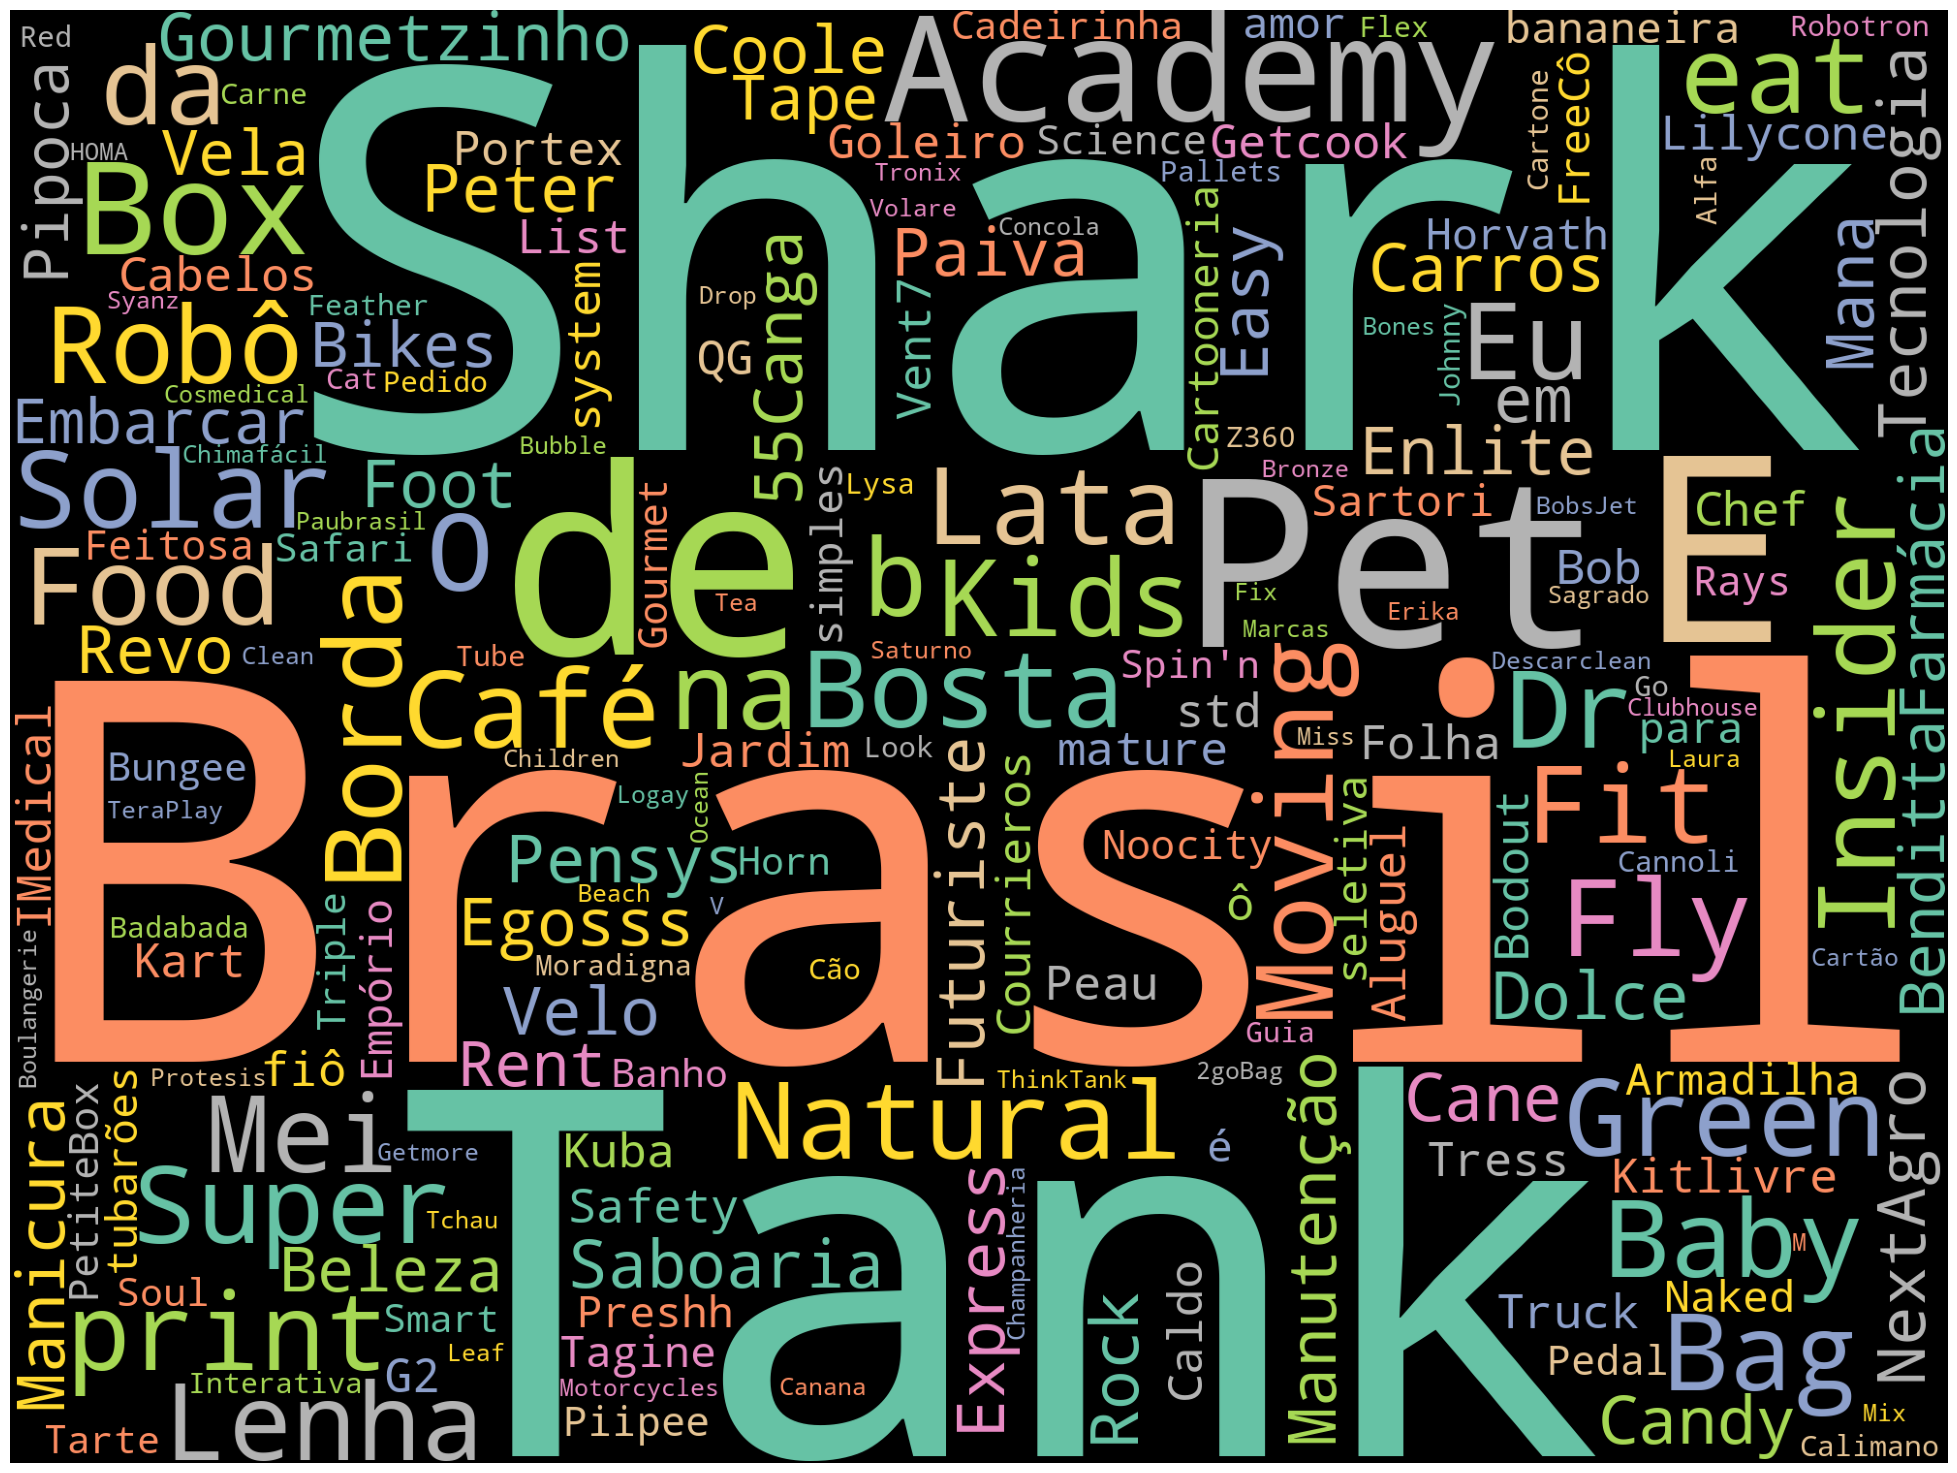

In [35]:
# Word cloud based on Startup Names, in all seasons
text = " Shark Tank Brasil ".join(cat for cat in shark_tank['Startup Name'])
stop_words = list(STOPWORDS)
wordcloud = WordCloud(width=2000, height=1500, stopwords=stop_words, background_color='black', colormap='Set2', collocations=False, random_state=2025).generate(text)
plt.figure(figsize=(25,20))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

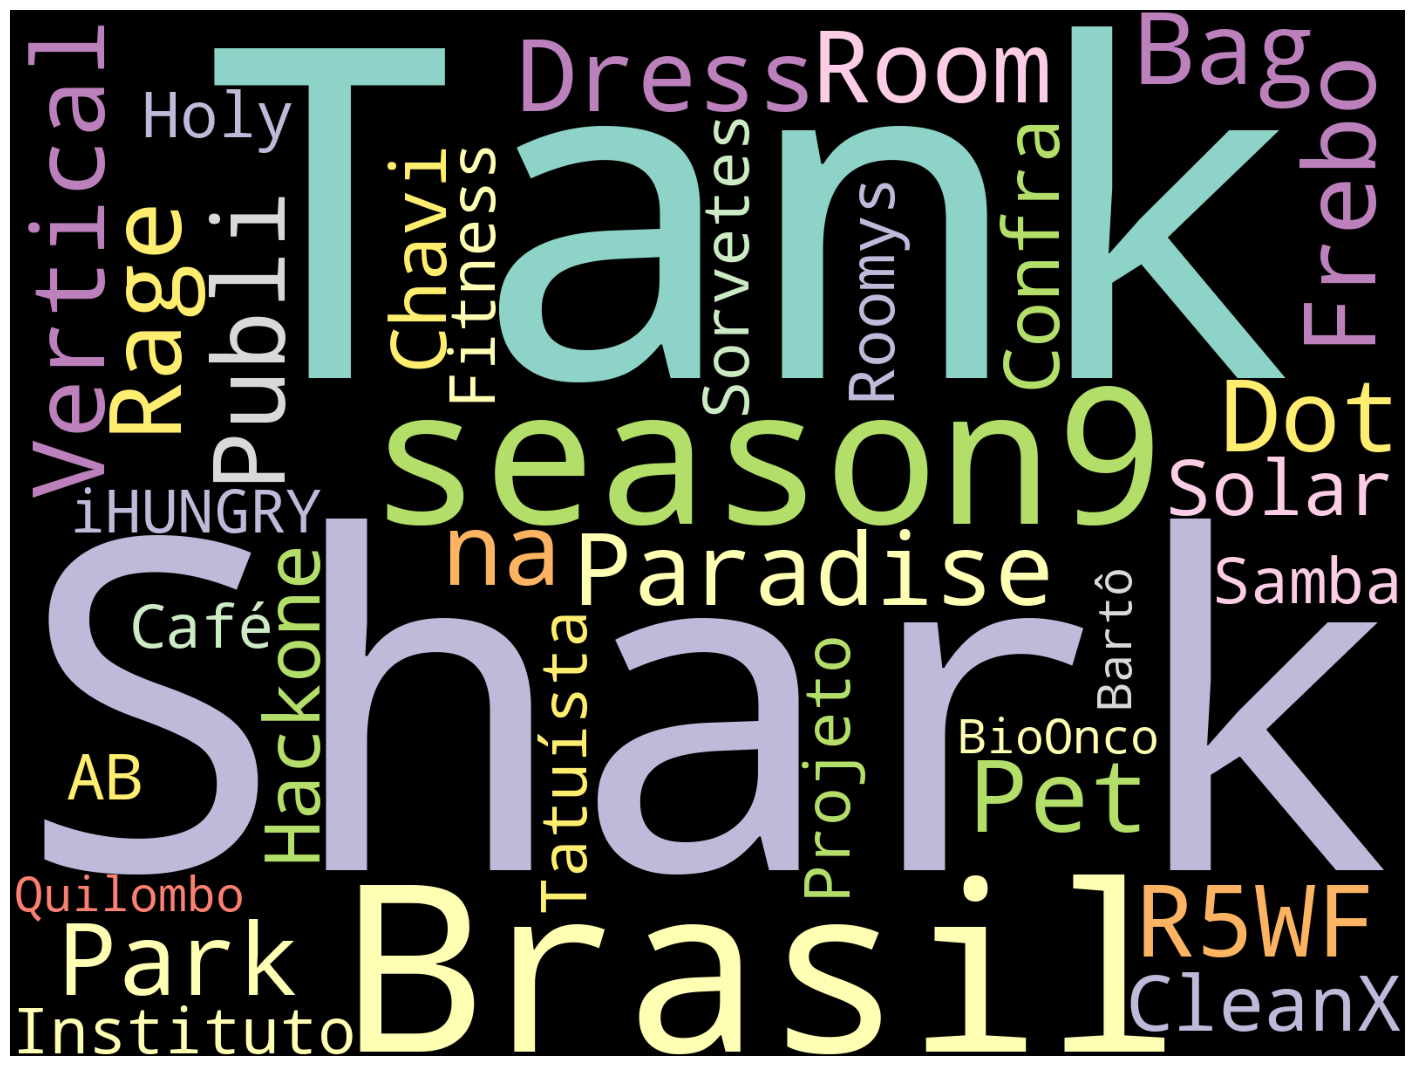

In [36]:
# Word cloud based on Startup Names, in current/latest season (9th season)
text = " Shark Tank Brasil season9 ".join(cat for cat in shark_tank_recent['Startup Name'])
stop_words = list(STOPWORDS)
wordcloud = WordCloud(width=1600, height=1200, stopwords=stop_words, background_color='black', colormap='Set3', collocations=False, random_state=2025).generate(text)
plt.figure(figsize=(18,15))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## 🔎 Shark Tank India Dataset https://www.kaggle.com/datasets/thirumani/shark-tank-india

Number of Sharks in Deal
1.0    21
2.0    10
3.0     5
5.0     1
Name: count, dtype: int64 

Number of Sharks in Deal
1.0    57%
2.0    27%
3.0    14%
5.0     3%
Name: proportion, dtype: object


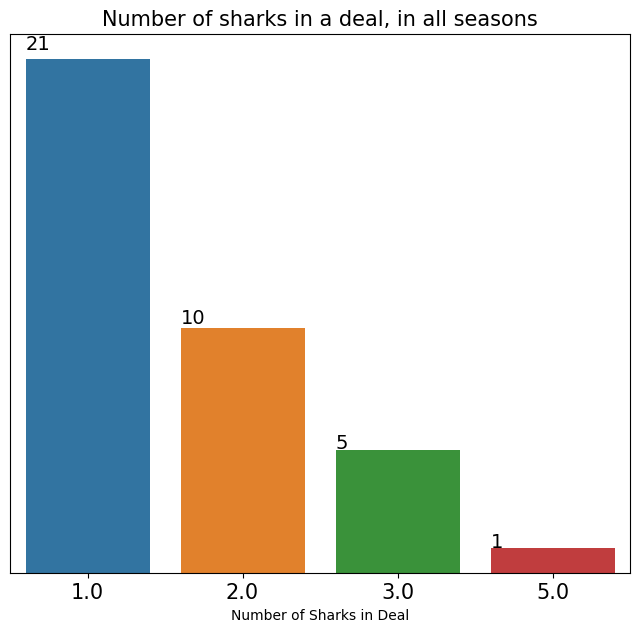

In [37]:
# Number of sharks in a deal, in all seasons
print(shark_tank['Number of Sharks in Deal'].value_counts(), "\n")

# In percentage
print(round(shark_tank['Number of Sharks in Deal'].value_counts(normalize=True)*100).astype(str).str.replace('.0', '%', regex=False))

fig = plt.figure(figsize=(8, 7))
plt.title("Number of sharks in a deal, in all seasons", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks([])
ax = sns.countplot(data = shark_tank, x = 'Number of Sharks in Deal')
ax.set_ylabel('')
for t in ax.patches:
    if (np.isnan(float(t.get_height()))):
        ax.annotate(0, (t.get_x(), 0))
    else:
        ax.annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.02), size=14)

In [38]:
# All sharks deals
print(shark_tank.loc[shark_tank['Number of Sharks in Deal'] >= 5][["Season Number","Startup Name","Total Deal Amount","Total Deal Equity"]])

    Season Number Startup Name  Total Deal Amount  Total Deal Equity
65              1    Moradigna           300000.0                0.0


In [39]:
# Most frequently asked amount, by startups
shark_tank.groupby('Original Ask Amount').size().nlargest(10)

# Original Ask Amount (BRL) and Number of times asked

Original Ask Amount
300000.0    12
500000.0    10
400000.0     9
200000.0     8
150000.0     5
250000.0     5
100000.0     4
50000.0      3
350000.0     3
600000.0     2
dtype: int64

In [40]:
# Most frequently offered equity, by startups
shark_tank.groupby('Original Offered Equity').size().nlargest(10)

# Original Offered Equity (in %) and Number of times offered

Original Offered Equity
10.0    26
20.0    14
15.0    11
5.0     10
30.0     9
25.0     4
8.0      3
7.0      2
40.0     2
4.0      1
dtype: int64

In [41]:
# ✅ Most frequently invested amount, by Sharks
shark_tank.groupby('Total Deal Amount').size().nlargest(10)

# Total Deal Amount (BRL) and Number of times invested

Total Deal Amount
300000.0     7
200000.0     4
500000.0     4
150000.0     3
250000.0     2
400000.0     2
1000000.0    2
5.0          1
50000.0      1
100000.0     1
dtype: int64

In [42]:
# ✅ Most frequently received total equity, by Sharks
shark_tank.groupby('Total Deal Equity').size().nlargest(10)

# Total Deal Equity (in %) and Number of times invested

Total Deal Equity
50.0    13
20.0     4
30.0     4
15.0     3
25.0     2
35.0     2
60.0     2
0.0      1
12.0     1
33.0     1
dtype: int64

In [43]:
# Many (5) companies got more amount than they asked/expected
print(shark_tank.loc[shark_tank['Original Ask Amount'] < shark_tank["Total Deal Amount"]][["Startup Name"]].count())
shark_tank.loc[shark_tank['Original Ask Amount'] < shark_tank["Total Deal Amount"]][["Season Number","Startup Name","Original Ask Amount","Total Deal Amount"]]

Startup Name    5
dtype: int64


,Season Number,Startup Name,Original Ask Amount,Total Deal Amount
0,1,Gourmetzinho,500000.0,600000.0
8,1,Futuriste,185000.0,200000.0
12,1,Egosss,250000.0,300000.0
29,1,Vent7,200000.0,300000.0
62,1,Banho Bungee,100000.0,150000.0


In [44]:
# Most of the companies diluted/gave their company equity more than they initially offered/expected
shark_tank.loc[shark_tank['Original Offered Equity'] < shark_tank["Total Deal Equity"]][["Season Number","Startup Name","Original Offered Equity","Total Deal Equity"]]

,Season Number,Startup Name,Original Offered Equity,Total Deal Equity
0,1,Gourmetzinho,20.0,60.0
2,1,Velo,20.0,50.0
4,1,Mana Manutenção,10.0,50.0
7,1,Peter Paiva Saboaria,20.0,50.0
8,1,Futuriste,15.0,25.0
9,1,Enlite,5.0,35.0
27,1,Tress Cabelos,5.0,50.0
29,1,Vent7,10.0,50.0
34,1,Getcook,10.0,30.0
36,1,Goleiro de Aluguel,25.0,50.0


In [45]:
# Below (3) companies got the same valuation they requested (with or without loan)
print(shark_tank.loc[shark_tank['Valuation Requested'] == shark_tank["Deal Valuation"]][["Startup Name"]].count())
shark_tank.loc[shark_tank['Valuation Requested'] == shark_tank["Deal Valuation"]][["Season Number","Startup Name","Valuation Requested","Deal Valuation"]]

Startup Name    3
dtype: int64


,Season Number,Startup Name,Valuation Requested,Deal Valuation
20,1,Beleza de Farmácia,1000000.0,1000000.0
24,1,QG Food Truck,450000.0,450000.0
68,2,Alfa Look's,17.0,17.0


In [46]:
# There are 2 companies which got more valuation than they pitched
print(shark_tank.loc[shark_tank['Valuation Requested'] < shark_tank["Deal Valuation"]][["Startup Name"]].count())
shark_tank.loc[shark_tank['Valuation Requested'] < shark_tank["Deal Valuation"]][["Season Number","Startup Name","Valuation Requested","Deal Valuation"]]

Startup Name    2
dtype: int64


,Season Number,Startup Name,Valuation Requested,Deal Valuation
12,1,Egosss,1666667.0,2000000.0
62,1,Banho Bungee,250000.0,300000.0


In [47]:
# Correlation matrix
shark_tank.corr(numeric_only=True).style.background_gradient(cmap = 'Blues')

,Season Number,Episode Number,Pitch Number,Original Ask Amount,Original Offered Equity,Valuation Requested,Got Deal,Total Deal Amount,Total Deal Equity,Deal Valuation,Number of Sharks in Deal,Total Deal Amount in Millions
Season Number,1.000000,-0.174460,0.952388,0.175059,-0.125304,0.083454,0.283244,0.265990,-0.410230,0.469428,0.292921,0.265990
Episode Number,-0.174460,1.000000,0.033027,0.033848,0.001960,-0.031053,-0.130848,-0.163793,0.135436,-0.226648,-0.027095,-0.163793
Pitch Number,0.952388,0.033027,1.000000,0.109867,-0.100898,0.028195,0.301974,0.250566,-0.437233,0.505015,0.301513,0.250566
Original Ask Amount,0.175059,0.033848,0.109867,1.000000,-0.109179,0.941014,-0.157559,0.992886,-0.095785,0.761451,0.201545,0.992886
Original Offered Equity,-0.125304,0.001960,-0.100898,-0.109179,1.000000,-0.179466,0.089470,-0.294601,0.395407,-0.384596,-0.234170,-0.294601
Valuation Requested,0.083454,-0.031053,0.028195,0.941014,-0.179466,1.000000,-0.123670,0.818500,-0.174290,0.628426,0.104869,0.818500
Got Deal,0.283244,-0.130848,0.301974,-0.157559,0.089470,-0.123670,1.000000,0.020797,0.399026,nan,-0.134880,0.020797
Total Deal Amount,0.265990,-0.163793,0.250566,0.992886,-0.294601,0.818500,0.020797,1.000000,-0.052645,0.753561,0.178955,1.000000
Total Deal Equity,-0.410230,0.135436,-0.437233,-0.095785,0.395407,-0.174290,0.399026,-0.052645,1.000000,-0.576275,-0.293017,-0.052645
Deal Valuation,0.469428,-0.226648,0.505015,0.761451,-0.384596,0.628426,nan,0.753561,-0.576275,1.000000,0.350623,0.753561


In [48]:
print("numpy version: {}". format(np.__version__))
print("pandas version: {}". format(pd.__version__))
import matplotlib
print("matplotlib version: {}". format(matplotlib. __version__))
print("seaborn version: {}". format(sns.__version__))
import plotly
print("plotly version: {}". format(plotly.__version__))

# Current Python package versions
# numpy version: 1.26.4
# pandas version: 2.2.3
# matplotlib version: 3.7.2
# seaborn version: 0.12.2
# plotly version: 5.24.1

numpy version: 1.26.4
pandas version: 2.2.3
matplotlib version: 3.7.2
seaborn version: 0.12.2
plotly version: 5.24.1


## Data set values verification (you can ignore below section)
##### below queries should not return any rows

In [49]:
shark_tank.loc[(shark_tank['Got Deal'] == 1) & (shark_tank['Total Deal Amount'].isnull())]

,Season Number,Startup Name,Episode Number,Pitch Number,Season Start,Season End,Original Air Date,Industry,Business Description,Original Ask Amount,Original Offered Equity,Valuation Requested,Got Deal,Total Deal Amount,Total Deal Equity,Deal Valuation,Deal Has Conditions,Number of Sharks in Deal,Invested Shark Names,Total Deal Amount in Millions
45,1,Tagine,11,46,10-Oct-2016,26-Jan-2017,19-Dec-2016,NaN,NaN,250000.0,30.0,833333.0,1.0,NaN,60.0,0.0,NaN,1.0,Robinson Shiba,NaN


In [50]:
shark_tank.loc[(shark_tank['Got Deal'] == 1) & (shark_tank['Total Deal Equity'].isnull())]

,Season Number,Startup Name,Episode Number,Pitch Number,Season Start,Season End,Original Air Date,Industry,Business Description,Original Ask Amount,Original Offered Equity,Valuation Requested,Got Deal,Total Deal Amount,Total Deal Equity,Deal Valuation,Deal Has Conditions,Number of Sharks in Deal,Invested Shark Names,Total Deal Amount in Millions


In [51]:
shark_tank.loc[(shark_tank['Got Deal'] == 1) & (shark_tank['Deal Valuation'].isnull())]

,Season Number,Startup Name,Episode Number,Pitch Number,Season Start,Season End,Original Air Date,Industry,Business Description,Original Ask Amount,Original Offered Equity,Valuation Requested,Got Deal,Total Deal Amount,Total Deal Equity,Deal Valuation,Deal Has Conditions,Number of Sharks in Deal,Invested Shark Names,Total Deal Amount in Millions


In [52]:
shark_tank.loc[(shark_tank['Got Deal'] == 1) & (shark_tank['Number of Sharks in Deal'].isnull())]

,Season Number,Startup Name,Episode Number,Pitch Number,Season Start,Season End,Original Air Date,Industry,Business Description,Original Ask Amount,Original Offered Equity,Valuation Requested,Got Deal,Total Deal Amount,Total Deal Equity,Deal Valuation,Deal Has Conditions,Number of Sharks in Deal,Invested Shark Names,Total Deal Amount in Millions


In [53]:
# shark_tank.loc[(shark_tank['Accepted Offer'] == 1) & (shark_tank['Investment Amount Per Shark'].isnull())]

In [54]:
# shark_tank.loc[(shark_tank['Accepted Offer'] == 1) & (shark_tank['Equity Per Shark'].isnull())]

In [55]:
shark_tank.loc[(shark_tank['Got Deal'] == 0) & (shark_tank['Invested Shark Names'].notnull())]

,Season Number,Startup Name,Episode Number,Pitch Number,Season Start,Season End,Original Air Date,Industry,Business Description,Original Ask Amount,Original Offered Equity,Valuation Requested,Got Deal,Total Deal Amount,Total Deal Equity,Deal Valuation,Deal Has Conditions,Number of Sharks in Deal,Invested Shark Names,Total Deal Amount in Millions
28,1,List It,7,29,10-Oct-2016,26-Jan-2017,21-Nov-2016,Children/Education,School supplies platform,200000.0,30.0,666667.0,0.0,NaN,NaN,NaN,NaN,1.0,Cristiana Arcangeli,NaN
35,1,Caldo Natural,9,36,10-Oct-2016,26-Jan-2017,5-Dec-2016,NaN,NaN,400000.0,15.0,2666667.0,0.0,NaN,NaN,NaN,NaN,1.0,Carlos Wizard Martins,NaN
57,1,Feitosa Gourmet,14,58,10-Oct-2016,26-Jan-2017,9-Jan-2017,NaN,NaN,120000.0,25.0,480000.0,0.0,NaN,NaN,NaN,NaN,1.0,Carlos Wizard Martins,NaN
65,1,Moradigna,16,66,10-Oct-2016,26-Jan-2017,26-Jan-2017,NaN,NaN,300000.0,10.0,3000000.0,0.0,300000.0,0.0,NaN,NaN,5.0,"João Appolinário, Cristiana Arcangeli, Robinso...",0.3
66,2,O Pedido,1,67,22-Jun-2017,14-Sep-2017,22-Jun-2017,Lifestyle/Home,Organizing romantic marriage proposals and exp...,300000.0,20.0,1500000.0,0.0,NaN,NaN,NaN,NaN,NaN,Nenhum,NaN
67,2,Cartone,1,68,22-Jun-2017,14-Sep-2017,22-Jun-2017,Lifestyle/Home,"Furniture, houses, and blocks/toys made from r...",300000.0,20.0,1500000.0,0.0,NaN,NaN,NaN,NaN,NaN,Nenhum,NaN
70,2,Cannoli do Calimano,2,71,22-Jun-2017,14-Sep-2017,29-Jun-2017,NaN,NaN,150000.0,30.0,500000.0,0.0,NaN,NaN,NaN,NaN,NaN,Nenhum,NaN
71,2,Cat My Pet,2,72,22-Jun-2017,14-Sep-2017,29-Jun-2017,NaN,NaN,400000.0,15.0,2666667.0,0.0,NaN,NaN,NaN,NaN,NaN,Nenhum,NaN
